In [26]:
# read in testing data
import pandas as pd
data = pd.read_csv('test_df.csv').drop('Unnamed: 0', axis=1)
data

import numpy as np
for i in range(len(data)):
    data_array = []
    data_string = ''
    data_string = data_string + ' ' + data['gameDescription'][i]
    try:
        data_string = data_string + ' ' + data['series'][i]
    except:
        data_string = data_string + ''
    try: 
        data_string = data_string + ' ' + data['keywords'][i]
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['themes'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['playerPerspectives'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['genres'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['playModes'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    try:
        data_string = data_string + ' ' + data['systems'][i].replace('[', '').replace("'", '').replace("]", '').replace(",", '')
    except:
        data_string = data_string + ''
    if data['memberRating'][i] == 'Fair':
        rating = 1
    elif data['memberRating'][i] == 'Alright':
        rating = 2
    elif data['memberRating'][i] == 'Average':
        rating = 1
    elif data['memberRating'][i] == 'Good':
        rating = 3
    elif data['memberRating'][i] == 'Great':
        rating = 4
    elif data['memberRating'][i] == 'Superb':
        rating = 4
    elif data['memberRating'][i] == 'Unimpressive':
        rating = 1
    elif data['memberRating'][i] == 'Very Bad':
        rating = 1
    elif data['memberRating'][i] == 'Bad':
        rating = 1
    elif data['memberRating'][i] == 'Awful':
        rating = 1
    data_array.append(rating)
    data_array.append(data_string)
    if i == 0:
        test_df = pd.DataFrame(np.reshape(data_array, (1,2)), columns = ['rating','text'])
    else:
        df_length = len(test_df)
        test_df.loc[df_length] = data_array

In [27]:
test_df.to_csv('cleaned_test_df.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    min_df=1,  # min count for relevant vocabulary
    max_features=4000,  # maximum number of features
    strip_accents='unicode',  # replace all accented unicode char 
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=r'\w{1,}',  # tokenize only words of 4+ chars
    ngram_range=(1, 1),  # features made of a single tokens
    use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)

tfidf_df = tfidf_vectorizer.fit_transform(test_df['text'])

In [ ]:
tfidf_vectorizer.get_feature_names()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df['text'].to_numpy(), test_df['rating'].to_numpy(),
                                                    test_size=0.50, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Train
y_train=y_train.astype(int)
rf.fit(vectors_train, y_train)
rf.predict(vectors_test)
# # Load packages
# import pandas as pd
# from sklearn.datasets import load_boston
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import tree
# from dtreeviz.trees import dtreeviz # will be used for tree visualization
# from matplotlib import pyplot as plt
# plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
# plt.rcParams.update({'font.size': 14})

# len(rf.estimators_)

# plt.figure(figsize=(20,20))
# _ = tree.plot_tree(rf.estimators_, filled=True)

array([3, 1, 3, ..., 2, 3, 2])

In [12]:
rf.estimators_[0].tree_.max_depth

121

In [13]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(max_depth=3)

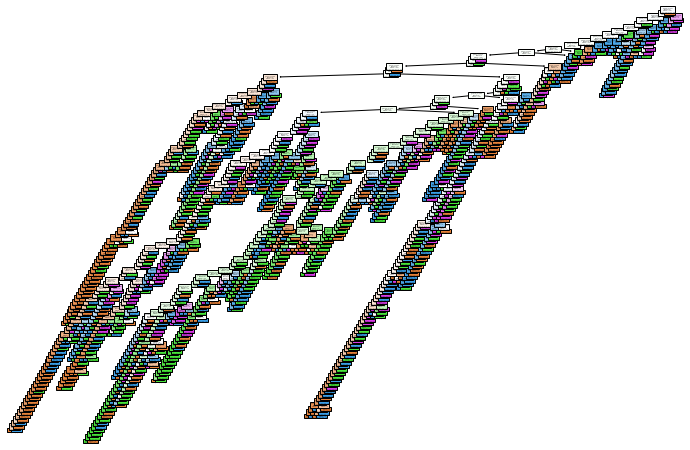

In [15]:
_ = tree.plot_tree(rf.estimators_[0], filled=True)

In [17]:
viz = dtreeviz(rf.estimators_[0], X, y, target_name="Target")
viz

NameError: name 'X' is not defined

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df['text'].to_numpy(), test_df['rating'].to_numpy(),
                                                    test_size=0.50, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Train
y_train=y_train.astype(int)
rf.fit(vectors_train, y_train)

RandomForestClassifier()

In [28]:
test_df

rating                                               text
0         2   #KILLALLZOMBIES is an insane twin-stick zombi...
1         3   You got a problem? Yo, she’ll splode it. At t...
2         2   Be prepared to be transported to a reality of...
3         2   A remastered collection of the .hack//G.U. se...
4         2   .hack//G.U. simulates a massively multiplayer...
...     ...                                                ...
5629      2   Updated version of the classic Puyo Puyo puzz...
5630      2   Puyo Puyo is a puzzle game in which the playe...
5631      2   This is the 7th game in the main Puyo Puyo se...
5632      2   Easy to learn, tough to master! Jump straight...
5633      2   Hmm.  no websites found for this game. Care t...

[5634 rows x 2 columns]

In [29]:
from sklearn.cluster import KMeans
import numpy as np

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(test_df['text'].to_numpy(), test_df['rating'].to_numpy(),
                                                    test_size=0.75, random_state=42)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors_train = vectorizer.fit_transform(test_df['text'][0:5000].to_numpy())
vectors_test = vectorizer.transform(test_df['text'][5044:5050].to_numpy())

 # Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=25)

In [66]:
 # Fit the model to the data
kmeans.fit(vectors_train)

KMeans(n_clusters=25)

In [67]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=25, n_jobs=1, precompute_distances='auto')

In [68]:
# Predict the clusters
predicted_clusters = kmeans.predict(vectors_test)

In [69]:
for i in range(len(predicted_clusters)):
    print(predicted_clusters[i])

16
23
3
5
5
5


In [70]:
kmeans.labels_

array([ 3,  1,  3, ..., 18, 18,  5])

In [75]:
train_df = test_df[0:5000]
train_df

rating                                               text
0         2   #KILLALLZOMBIES is an insane twin-stick zombi...
1         3   You got a problem? Yo, she’ll splode it. At t...
2         2   Be prepared to be transported to a reality of...
3         2   A remastered collection of the .hack//G.U. se...
4         2   .hack//G.U. simulates a massively multiplayer...
...     ...                                                ...
4995      2   Become an expert in mine clearance! MineSweep...
4996      1   Modern take on the classic minefield game!Ton...
4997      3   In Mini Metro, you take on the task of design...
4998      3   In Mini Metro, you take on the task of design...
4999      2   In the free-to-play game Mini Mario and Frien...

[5000 rows x 2 columns]

In [76]:
train_df['Cluster'] = ''
train_df

C:\Users\clewe\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rating                                               text Cluster
0         2   #KILLALLZOMBIES is an insane twin-stick zombi...        
1         3   You got a problem? Yo, she’ll splode it. At t...        
2         2   Be prepared to be transported to a reality of...        
3         2   A remastered collection of the .hack//G.U. se...        
4         2   .hack//G.U. simulates a massively multiplayer...        
...     ...                                                ...     ...
4995      2   Become an expert in mine clearance! MineSweep...        
4996      1   Modern take on the classic minefield game!Ton...        
4997      3   In Mini Metro, you take on the task of design...        
4998      3   In Mini Metro, you take on the task of design...        
4999      2   In the free-to-play game Mini Mario and Frien...        

[5000 rows x 3 columns]

In [78]:
for i in range(5000):
    cluster = predicted_clusters[i]
    train_df['Cluster'][i] = cluster
train_df    

C:\Users\clewe\anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


IndexError: index 6 is out of bounds for axis 0 with size 6

In [81]:
result_df = test_df[5044:5050].reset_index(drop=True)
result_df['Cluster'] = ''
for i in range(len(result_df)):
    cluster = kmeans.labels_[i]
    result_df['Cluster'][i] = cluster
result_df

rating                                               text Cluster
0      4   Wannabe pirate Guybrush Threepwood, and the n...       3
1      1   The curtain rises on yet another never-before...       1
2      3   Monochroma is a cinematic puzzle platformer t...       3
3      2   This is an adaptation of the Monopoly board g...      16
4      2   This is an adaptation of the Monopoly board g...      16
5      2   Four board game adaptations for Nintendo DS. ...      21

In [83]:
train_df[train_df['Cluster'] == 3]

rating                                               text Cluster
2         2   Be prepared to be transported to a reality of...       3
25        1   Aban Hawkins & the 1000 Spikes is an 8-bit re...       3
34        3   140 is an indie 2D puzzle-platformer. It feat...       3
40        3   1979 Revolution, the action/adventure game, i...       3
52        2   20XX is a co-op-friendly action platformer ro...       3
...     ...                                                ...     ...
4909      2   Metaloid: Origin is an fast-paced gun’n'run 2...       3
4913      1   Metrico+ is an input-driven game in a world o...       3
4976      2   A sequel to the 3DS/Wii U puzzle-platformer b...       3
4977      4   Switch up the fun with four games in one with...       3
4996      1   Modern take on the classic minefield game!Ton...       3

[387 rows x 3 columns]